# Tensorflow Basics

This very abstract manual neural network is built slighly similar and analogical to **tensorflow's'** structure.

**Operation Class**
* Input Nodes
* Output Nodes
* Global Graph Default Variable
* Compute   
     overwritten by extended class

**Placeholder** - An empty node that needs a value to be provided to compute the output.  
**Variables** - Changeable parameter of Graph. ( can be thought of as weights of ANN ).    
**Graph** - Global Variables connecting variables and placeholders to operations.

### Operation

This Operation class will be inherited by other classes that actually compute the specific
    operation, such as adding or matrix multiplication.

In [180]:
class Operation():

    def __init__(self, input_nodes = []):
        
        self.input_nodes = input_nodes #list of input nodes
        self.output_nodes = []         #list of nodes to recieve output of this node
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
        
    def compute(self):  #Just a placeholder
        pass

In [181]:
class add(Operation):
    def __init__(self, x,y):
        super().__init__([x,y])
            
    def compute(self, x_var, y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var
    

In [182]:
class multiply(Operation):
    def __init__(self, x,y):
        super().__init__([x,y])
            
    def compute(self, x_var, y_var):
        self.inputs = [x_var,y_var]
        return (x_var * y_var)

In [183]:
class matmul(Operation):
    def __init__(self, x,y):
        super().__init__([x,y])
            
    def compute(self, x_var, y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var)

In [184]:
class Placeholder():
     
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [185]:
class Variable():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)    

In [186]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.variables = []
        self.placeholders = []
    
    def set_as_default(self):
        global _default_graph
        _default_graph = self

$$ z = Ax + b $$

(if A = 10, b =1) then   

$$ z = 10x + 1 $$   
here x is a placeholder.

In [187]:
g = Graph()

In [188]:
g.set_as_default()

In [189]:
A = Variable(10)

In [190]:
x = Placeholder()

In [191]:
b = Variable(1)

In [192]:
y = multiply(A, x)

In [193]:
z = add(y, b)

In [194]:
import numpy as np

## Session

To make sure we execute nodes in the correct order (Ax first then add b), we use **Post Order Tree Traversal**.

In [195]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    recurse(operation)
    return nodes_postorder

In [196]:
class Session():
    
    def run(self, operation, feed_dict = {}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                #It is and operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs) #args
                
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        return operation.output

A **feed_dict** is a dictionary is a dictionary mapping **placeholders** to their values.  

If the node is an **operation** then we create a list of input values for that operation.  
The compute method argument has a parameter with asterix ( * ) because we don't know how much inputs are required for the operaation. So it allows to take as much inputs as operation requires.

In [197]:
sess = Session()

In [198]:
sess.run(operation = z, feed_dict= {x: 5})

51

In [199]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
B = Variable([1, 1])

x = Placeholder()

y =  matmul(A, x)
z = add(y, B)

In [200]:
sess = Session()

In [201]:
sess.run(operation = z, feed_dict= {x: 10})

array([[101, 201],
       [301, 401]])

## Activation Function

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

In [204]:
sample_z = np.linspace(-10, 10, 100)
sample_a = Sigmoid(sample_z)

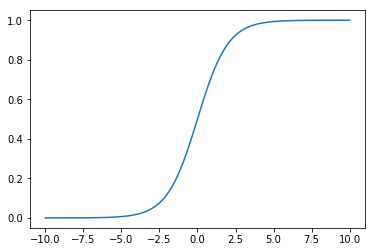

In [205]:
plt.plot(sample_z, sample_a)

We can observe the **Sigmoid** function.

Now we create Sigmoid as an Operation.

In [206]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        
        super().__init__([z])
        
    def compute(self, z_val):
        return 1/(1+(np.exp(-z_val)))

## Classification Example


Creating and Visualising data

In [207]:
from sklearn.datasets import make_blobs

In [208]:
data = make_blobs(n_samples= 50, n_features= 2, centers= 2, random_state= 75)

In [209]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [210]:
features = data[0]
labels = data[1]

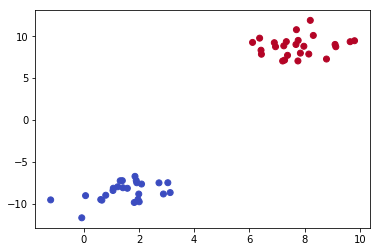

In [211]:
plt.scatter(features[:,0], features[:, 1], c = labels, cmap= 'coolwarm')

In [212]:
#Drawing a classification line between
x = np.linspace(-2, 12, 12)
y = (-1*x)

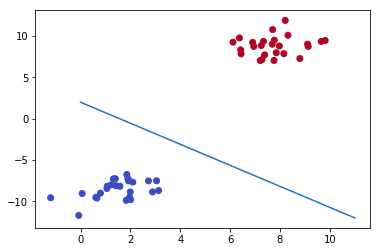

In [213]:
plt.scatter(features[:,0], features[:, 1], c = labels, cmap= 'coolwarm')
plt.plot(y)

## Defining the Perceptron

$$ y = mx + b $$

$$ y = -x + 5 $$

$$ f1 = mf2 + b , m=1$$

$$ f1 = -f2 + 5 $$

$$ f1 + f2 - 5 = 0 $$


### Convert to a Matrix Representation of Features

$$ w^Tx + b = 0 $$

$$   \Big(1, 1\Big)f - 5 = 0 $$

Then if the result is > 0 its label 1, if it is less than 0, it is label=0



### Example Point

Let's say we have the point f1=2 , f2=2 otherwise stated as (8,10). Then we have:

$$ 
\begin{pmatrix} 
1 , 1
\end{pmatrix} 
\begin{pmatrix} 
8 \\
10
\end{pmatrix} - 5 =  $$

In [214]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

or if we have (4, -10)

In [215]:
np.array([1,1]).dot(np.array([[4],[-10]])) - 5

array([-11])

## Implementing through Session

In [216]:
g = Graph()

In [217]:
w = Variable([1, 1])

In [218]:
x = Placeholder()

In [219]:
b = Variable(-5)

In [220]:
z = add(matmul(w,x), b)

In [221]:
a = Sigmoid(z)

In [222]:
sess = Session()

In [232]:
res1 = sess.run(operation = a, feed_dict= {x: [8, 10]})

In [234]:
if (res1 > 0.5):
    print("Red")
else:
    print("Blue")
    

Red


In [235]:
res2 = sess.run(operation= a, feed_dict= {x: [4, -10]})

In [236]:
if (res2 > 0.5):
    print("Red")
else:
    print("Blue")
    

Blue


### Voila!